<center><h1>Mining Twitter Data Using Python / Tweepy / WordCloud</h1></center>

#### Install tweepy, wordcloud, and pillow:

- pip install tweepy
- pip instal wordcloud
- pip install pillow

## Main script that parses the stream of tweets based on a filter word

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

# Then run this script below to create a Python dataframe of the tweets data

In [23]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'daredevil.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:            # Ensure json data is complete
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

407


### Create pandas dataframe

In [27]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

### Let's remove redundand tweets, retweets, duplicates, and limit to English tweets

In [28]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]

In [29]:
english_tweets = english_tweets.drop_duplicates(subset='sample');

In [30]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")

## Now create the word cloud

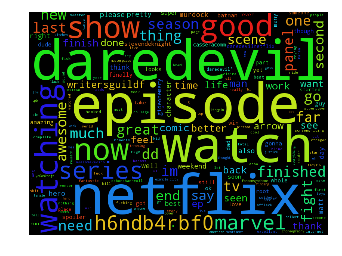

In [31]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
    'rt',
    'ebay',
    't',
    'https',
    'co',
    't',
    'amp',
    's',
    'tcot',
    'de'
]

for word in additional_words:
    STOPWORDS.add(word)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
#honda_mask = imread(path.join(d, "honda_logo_mask.png"), flatten=True)
#wc = WordCloud(background_color="black", max_words=2000, mask=honda_mask, stopwords=STOPWORDS)

wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "civic.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.gca().xaxis.set_major_locator(NullLocator())   # remove white space
plt.gca().yaxis.set_major_locator(NullLocator())   # remove white space
#plt.figure()
#plt.imshow(honda_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

### Top 50 Words

In [32]:
wc.process_text(text)[:50]

[('daredevil', 1.0),
 ('episode', 0.14285714285714285),
 ('netflix', 0.1357142857142857),
 ('watch', 0.12857142857142856),
 ('watching', 0.12142857142857143),
 ('show', 0.1),
 ('now', 0.07142857142857142),
 ('good', 0.07142857142857142),
 ('series', 0.07142857142857142),
 ('marvel', 0.060714285714285714),
 ('h6ndb4rbf0', 0.05357142857142857),
 ('finished', 0.05),
 ('season', 0.04642857142857143),
 ('one', 0.04642857142857143),
 ('im', 0.039285714285714285),
 ('need', 0.039285714285714285),
 ('fight', 0.039285714285714285),
 ('great', 0.03571428571428571),
 ('far', 0.03214285714285714),
 ('dd', 0.03214285714285714),
 ('panel', 0.03214285714285714),
 ('awesome', 0.02857142857142857),
 ('thing', 0.02857142857142857),
 ('new', 0.02857142857142857),
 ('go', 0.02857142857142857),
 ('last', 0.02857142857142857),
 ('much', 0.025),
 ('tv', 0.025),
 ('second', 0.025),
 ('end', 0.025),
 ('scene', 0.025),
 ('say', 0.025),
 ('writersguildf', 0.025),
 ('done', 0.025),
 ('ep', 0.02142857142857143),
 

In [21]:
english_tweets = english_tweets[english_tweets['text'].str.contains('netflix')]

In [22]:
english_tweets

text  \
10      watching the first episode of #daredevil on #netflix...so far it could use more lighting. … http://t.co/h6ndb4rbf0 http://t.co/plyiopnzrx   
11                                          dudes! the fight scene at the end of the second episode of the daredevil netflix series is fantastic!   
15   rt @seidodge: do i risk netflix cheating on the wife by sneaking in a couple of @daredevil episodes now she's in bed? we can watch them aga…   
59                                                rt @superherofeed: watch 'daredevil' on netflix now!  #legally #support https://t.co/5uoavzf1qn   
80   rt @lexarod: love s1 @daredevil @netflix amazing great show s2 soon? #charliecox @deborahannwoll @rosariodawson #eldenhenson http://t.co/qo…   
88                                                                                              netflix daredevil is sooooooo good! a must watch!   
96                                      if spiderman was given the netflix treatment, like daredevil, it would be the greatest show ever produced   
98               so @daredevil is one of the best tv series i've seen in such a long time. well done @marvel &amp; @netflix #proudofyou #thankyou   
99                                                                                      @daredevil #netflix series is pretty good. watch it asap.   
118                                                if you need me this weekend, i'll be busy watching @daredevil on netflix. try again on monday.   
122      netflix adds audio to bring 'daredevil' to life for the blind: copyright 2015 npr. to see more, visit http://w... http://t.co/sqgdvklllr   
147      finished the season of @daredevil on @netflix and now i have no idea what to do with my life. best show i've seen. i highly recommend it   
158                                                                                  ok i'm hooked on the netflix series daredevil-so far so good   
165                              if there was a way to cache or download netflix content, i'd be binge watching daredevil on the plane ride back.   
180                                                                                                             is daredevil on netflix any good?   
201                                             you go ahead and run your marathons, i'll watch mine. #daredevil #netflix https://t.co/2bdyfgqlxx   
204                                                          1 season of daredevil &gt; 3 seasons of arrow.....stick ftw #daredevilnetflix #arrow   

    lang                sample retweeted  
10    en  Watching the first e     False  
11    en  Dudes! The fight sce     False  
15    en  RT @seidodge: Do I r     False  
59    en  RT @SuperheroFeed: W     False  
80    en  RT @lexarod: Love S1     False  
88    en  Netflix Daredevil is     False  
96    en  If Spiderman was giv     False  
98    en  So @Daredevil is one     False  
99    en  @Daredevil #Netflix      False  
118   en  If you need me this      False  
122   en  Netflix Adds Audio T     False  
147   en  Finished the season      False  
158   en  ok i'm hooked on the     False  
165   en  If there was a way t     False  
180   en  Is daredevil on Netf     False  
201   en  You go ahead and run     False  
204   en  1 season of DareDevi     False